<a href="https://colab.research.google.com/github/Jose-Codes/INIT_Intro_To_ML_Series/blob/main/INIT_Intro_to_ML_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Linear Regression

In [ ]:
class LinearRegression:
    """
    Linear Regression implemented from scratch with gradient descent.
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the model.

        Args:
            learning_rate: Step size for gradient descent
            n_iterations: Number of training iterations
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None  # Weight parameter
        self.b = None  # Bias parameter
        self.loss_history = []  # Track loss during training
        self.w_history = []     # Track weight parameter during training
        self.b_history = []     # Track bias parameter during training

    def predict(self, X):
        """
        Make predictions using the current model parameters.

        Args:
            X: Features array

        Returns:
            y_pred: Predicted values
        """
        return self.w * X + self.b # y_hat = w*x + b

    def compute_loss(self, X, y):
        """
        Compute the Mean Squared Error loss.

        Args:
            X: Features array
            y: True target values

        Returns:
            loss: Mean Squared Error
        """
        y_pred = self.predict(X)
        loss = np.mean((y_pred - y) ** 2)
        return loss

    def compute_gradients(self, X, y):
        """
        Compute the gradients of the loss with respect to w and b.

        Args:
            X: Features array
            y: True target values

        Returns:
            dw: Gradient with respect to w
            db: Gradient with respect to b
        """
        n_samples = len(X)

        # Make predictions
        y_pred = self.predict(X)

        # Compute error
        error = y_pred - y

        # Compute gradients
        dw = (2 / n_samples) * np.sum(error * X)
        db = (2 / n_samples) * np.sum(error)

        return dw, db

    def fit(self, X, y, verbose=True, print_every=100, visualize_training=False, true_w=None, true_b=None):
        """
        Train the model using gradient descent.

        Args:
            X: Features array
            y: True target values
            verbose: Whether to print progress
            print_every: How often to print progress
            visualize_training: Whether to show real-time visualization during training
            true_w: True weight parameter (for visualization)
            true_b: True bias parameter (for visualization)

        Returns:
            self: The trained model
        """
        # Initialize parameters
        self.w = 0.0
        self.b = 0.0

        # Clear history
        self.loss_history = []
        self.w_history = []
        self.b_history = []

        # Set up real-time visualization if requested
        if visualize_training:
            plt.ion()  # Turn on interactive mode
            fig = plt.figure(figsize=(15, 5))

            # Plot for regression line
            ax1 = fig.add_subplot(1, 3, 1)
            scatter = ax1.scatter(X, y, alpha=0.7, label='Data')
            X_line = np.linspace(X.min(), X.max(), 100)
            line, = ax1.plot(X_line, self.w * X_line + self.b, 'r-', linewidth=2,
                           label=f'Fitted: y = {self.w:.2f}x + {self.b:.2f}')

            if true_w is not None and true_b is not None:
                ax1.plot(X_line, true_w * X_line + true_b, 'g--', linewidth=2,
                       label=f'True: y = {true_w:.2f}x + {true_b:.2f}')

            ax1.set_xlabel('X')
            ax1.set_ylabel('y')
            ax1.set_title('Linear Regression Progress')
            ax1.legend()
            ax1.grid(True)

            # Plot for loss history
            ax2 = fig.add_subplot(1, 3, 2)
            loss_line, = ax2.plot([], [], 'b-')
            ax2.set_xlabel('Iteration')
            ax2.set_ylabel('Loss (MSE)')
            ax2.set_title('Loss History')
            ax2.grid(True)
            ax2.set_xlim(0, self.n_iterations)
            ax2.set_ylim(0, compute_initial_loss_estimate(X, y))  # Estimate initial loss range

            # Plot for parameter history
            ax3 = fig.add_subplot(1, 3, 3)
            w_line, = ax3.plot([], [], 'r-', label='Weight (w)')
            b_line, = ax3.plot([], [], 'b-', label='Bias (b)')

            if true_w is not None:
                ax3.axhline(y=true_w, color='r', linestyle='--', alpha=0.5)
            if true_b is not None:
                ax3.axhline(y=true_b, color='b', linestyle='--', alpha=0.5)

            ax3.set_xlabel('Iteration')
            ax3.set_ylabel('Parameter Value')
            ax3.set_title('Parameter Convergence')
            ax3.grid(True)
            ax3.legend()
            ax3.set_xlim(0, self.n_iterations)

            # If true values are provided, set y limits accordingly
            if true_w is not None and true_b is not None:
                min_val = min(0, true_w - 1, true_b - 1)
                max_val = max(true_w + 1, true_b + 1)
                ax3.set_ylim(min_val, max_val)
            else:
                ax3.set_ylim(-1, 5)

            plt.tight_layout()
            plt.pause(0.01)

        # Main gradient descent loop
        for i in range(self.n_iterations):
            # Compute gradients
            dw, db = self.compute_gradients(X, y)

            # Update parameters
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

            # Compute and store loss
            if i % print_every == 0 or i == self.n_iterations - 1:
                loss = self.compute_loss(X, y)
                self.loss_history.append(loss)
                self.w_history.append(self.w)
                self.b_history.append(self.b)

                if verbose and i % print_every == 0:
                    print(f"Iteration {i}: Loss = {loss:.4f}, w = {self.w:.4f}, b = {self.b:.4f}")

                # Update visualization if requested
                if visualize_training and i % print_every == 0:
                    # Update regression line
                    line.set_ydata(self.w * X_line + self.b)
                    line.set_label(f'Fitted: y = {self.w:.2f}x + {self.b:.2f}')
                    ax1.legend()

                    # Update loss history
                    iterations = range(0, i+1, print_every)
                    loss_line.set_data(iterations, self.loss_history)
                    if self.loss_history:
                        ax2.set_ylim(0, max(self.loss_history) * 1.1)

                    # Update parameter history
                    w_line.set_data(iterations, self.w_history)
                    b_line.set_data(iterations, self.b_history)

                    # Redraw and pause briefly to update the display
                    fig.canvas.draw_idle()
                    plt.pause(0.01)

        # Turn off interactive mode if we used it
        if visualize_training:
            plt.ioff()
            plt.show()

        return self

    def score(self, X, y):
        """
        Calculate the coefficient of determination (R^2).

        Args:
            X: Features array
            y: True target values

        Returns:
            r2: R^2 score
        """
        y_pred = self.predict(X)

        # Total sum of squares
        ss_tot = np.sum((y - np.mean(y))**2)

        # Residual sum of squares
        ss_res = np.sum((y - y_pred)**2)

        # R^2 calculation
        r2 = 1 - (ss_res / ss_tot)

        return r2

    def visualize_results(self, X, y, true_w=None, true_b=None):
        """
        Visualize the regression results.

        Args:
            X: Features array
            y: True target values
            true_w: True weight parameter (if available)
            true_b: True bias parameter (if available)
        """
        plt.figure(figsize=(15, 5))

        # Plot 1: Data and regression line
        plt.subplot(1, 2, 1)
        plt.scatter(X, y, alpha=0.7, label='Data')

        # Sort X for smooth line plotting
        X_line = np.linspace(X.min(), X.max(), 100)

        # Plot our fitted line
        plt.plot(X_line, self.predict(X_line), 'r-', linewidth=2,
                 label=f'Fitted: y = {self.w:.2f}x + {self.b:.2f}')

        # Plot true line if provided
        if true_w is not None and true_b is not None:
            plt.plot(X_line, true_w * X_line + true_b, 'g--', linewidth=2,
                     label=f'True: y = {true_w:.2f}x + {true_b:.2f}')

        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression Result')
        plt.legend()
        plt.grid(True)

        # Plot 2: Loss history
        plt.subplot(1, 2, 2)
        # Create evenly spaced iterations to match loss_history length
        iterations = np.linspace(0, self.n_iterations, len(self.loss_history))
        plt.plot(iterations, self.loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss History')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # If we have enough history points, show parameter convergence
        if len(self.w_history) >= 10:
            plt.figure(figsize=(12, 5))

            # Create evenly spaced iterations to match parameter history length
            iterations = np.linspace(0, self.n_iterations, len(self.w_history))

            plt.subplot(1, 2, 1)
            plt.plot(iterations, self.w_history)
            if true_w is not None:
                plt.axhline(y=true_w, color='g', linestyle='--', label=f'True w = {true_w:.2f}')
            plt.xlabel('Iteration')
            plt.ylabel('Weight (w)')
            plt.title('Weight Convergence')
            plt.grid(True)
            if true_w is not None:
                plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(iterations, self.b_history)
            if true_b is not None:
                plt.axhline(y=true_b, color='g', linestyle='--', label=f'True b = {true_b:.2f}')
            plt.xlabel('Iteration')
            plt.ylabel('Bias (b)')
            plt.title('Bias Convergence')
            plt.grid(True)
            if true_b is not None:
                plt.legend()

            plt.tight_layout()
            plt.show()

In [ ]:
# Helper function to generate synthetic data
def generate_data(n_samples=100, noise=10, seed=42):
    """
    Generate synthetic data for linear regression.

    Args:
        n_samples: Number of data points to generate
        noise: Standard deviation of the Gaussian noise
        seed: Random seed for reproducibility

    Returns:
        X: Feature vector (n_samples,)
        y: Target vector (n_samples,)
        true_w: True weight parameter
        true_b: True bias parameter
    """
    np.random.seed(seed)

    # True parameters (weight and bias)
    true_w = 2.5
    true_b = 3.7

    # Generate random x values
    X = np.random.rand(n_samples) * 10

    # Generate y values with some noise
    y = true_w * X + true_b + np.random.randn(n_samples) * noise

    return X, y, true_w, true_b


# Helper function to estimate initial loss for setting y-axis limits
def compute_initial_loss_estimate(X, y):
    """Estimate the initial loss with w=0, b=0 to set reasonable plot limits"""
    initial_pred = np.zeros_like(y)
    initial_loss = np.mean((y - initial_pred) ** 2)
    return max(100, initial_loss * 1.5)  # Provide some headroom

# Run the example
def run_linear_regression_example():
    # Generate data
    X, y, true_w, true_b = generate_data(n_samples=100, noise=5)

    # Create and train model
    model = LinearRegression(learning_rate=0.01, n_iterations=1000)

    # Train with real-time visualization
    model.fit(X, y, print_every=10, visualize_training=True, true_w=true_w, true_b=true_b)

    # Print results
    print("\nFinal results:")
    print(f"Learned parameters: w = {model.w:.4f}, b = {model.b:.4f}")
    print(f"True parameters: w = {true_w:.4f}, b = {true_b:.4f}")
    print(f"Final loss (MSE): {model.compute_loss(X, y):.4f}")
    print(f"R^2 score: {model.score(X, y):.4f}")

    # Generate a static visualization of the final results
    model.visualize_results(X, y, true_w, true_b)

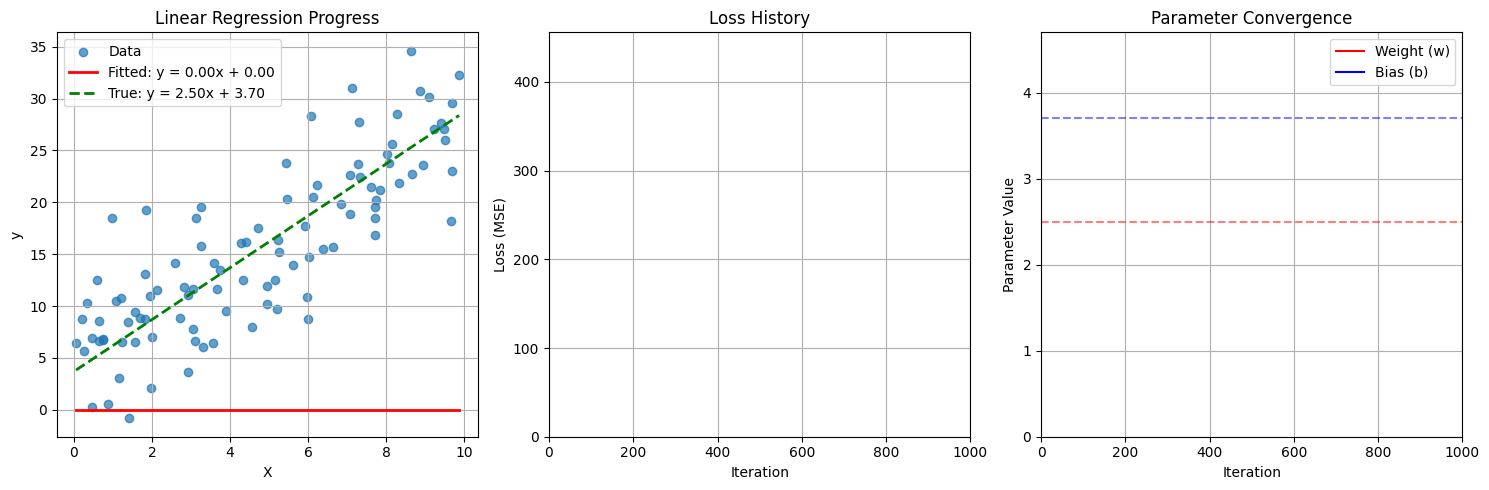

Iteration 0: Loss = 63.1691, w = 1.8506, b = 0.3090
Iteration 10: Loss = 24.8621, w = 2.8953, b = 0.7077
Iteration 20: Loss = 24.3675, w = 2.8615, b = 0.9278
Iteration 30: Loss = 23.9250, w = 2.8295, b = 1.1360
Iteration 40: Loss = 23.5291, w = 2.7992, b = 1.3329
Iteration 50: Loss = 23.1749, w = 2.7706, b = 1.5191
Iteration 60: Loss = 22.8580, w = 2.7435, b = 1.6953
Iteration 70: Loss = 22.5744, w = 2.7179, b = 1.8620
Iteration 80: Loss = 22.3207, w = 2.6937, b = 2.0196
Iteration 90: Loss = 22.0937, w = 2.6708, b = 2.1687
Iteration 100: Loss = 21.8906, w = 2.6491, b = 2.3097
Iteration 110: Loss = 21.7089, w = 2.6286, b = 2.4432
Iteration 120: Loss = 21.5463, w = 2.6092, b = 2.5693
Iteration 130: Loss = 21.4009, w = 2.5908, b = 2.6887
Iteration 140: Loss = 21.2707, w = 2.5735, b = 2.8016
Iteration 150: Loss = 21.1543, w = 2.5571, b = 2.9084
Iteration 160: Loss = 21.0501, w = 2.5416, b = 3.0094
Iteration 170: Loss = 20.9568, w = 2.5269, b = 3.1050
Iteration 180: Loss = 20.8734, w = 2.51

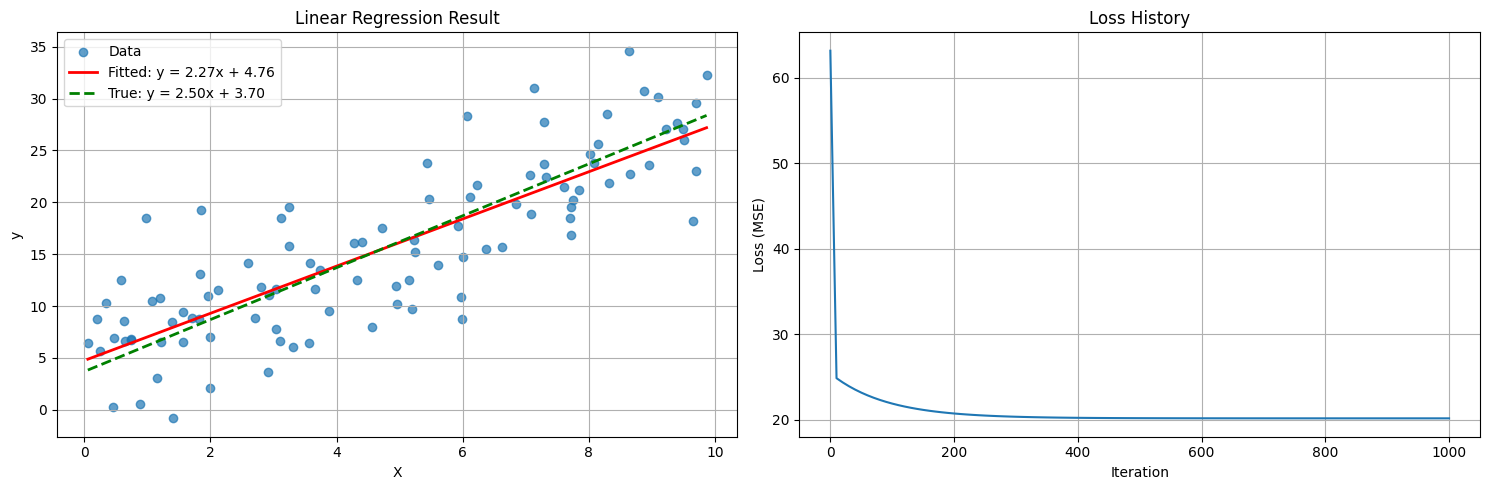

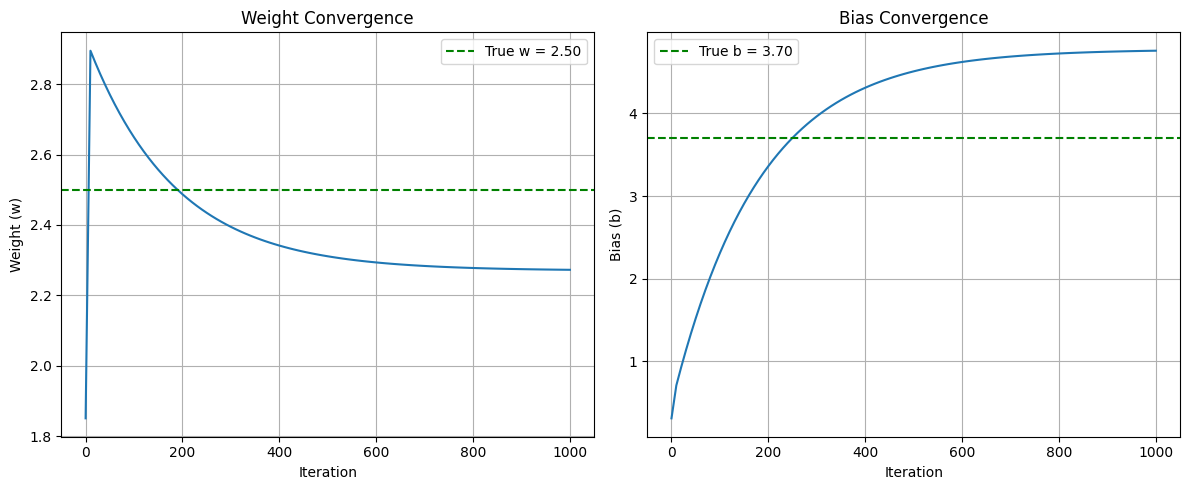

In [ ]:
X, y, true_w, true_b = generate_data(n_samples=100, noise=5)
linear_regression_model = LinearRegression(learning_rate=0.01, n_iterations=1000)
run_linear_regression_example()

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Gradient Descent Visualizations

In [ ]:
# First, install ipywidgets if not already installed
!pip install ipywidgets
# Run this in a separate cell if needed:
# !jupyter nbextension enable --py widgetsnbextension

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to create and update the plot
def plot_loss_function(w_param=3.0, learning_rate=0.1):
    # Clear previous plot
    plt.figure(figsize=(10, 6))

    # Define our loss function (simple parabola)
    def loss_function(w):
        return w**2 + 2  # Simple quadratic loss function (w^2 + 2)

    # Define the derivative of our loss function
    def loss_derivative(w):
        return 2*w  # Derivative of w^2 + 2 is 2w

    # Generate x values and calculate corresponding y values
    w_values = np.linspace(-5, 5, 1000)
    loss_values = loss_function(w_values)

    # Current values
    current_loss = loss_function(w_param)
    current_derivative = loss_derivative(w_param)

    # Create the plot
    plt.plot(w_values, loss_values, 'b-', lw=2, label='Loss function: L(w) = w² + 2')
    plt.plot(w_param, current_loss, 'ro', ms=10, label='Current position')

    # Plot the tangent line (derivative)
    slope_x = np.array([w_param - 0.5, w_param + 0.5])
    slope_y = current_loss + current_derivative * (slope_x - w_param)
    plt.plot(slope_x, slope_y, 'g-', lw=2, label=f'Slope (∂L/∂w = {current_derivative:.2f})')

    # Arrow for gradient descent step
    plt.arrow(w_param, current_loss, -learning_rate*current_derivative, 0,
             head_width=0.3, head_length=0.1, fc='r', ec='r', width=0.05,
             label='Gradient descent step')

    # Calculate the next step using gradient descent
    next_w = w_param - learning_rate * current_derivative
    next_loss = loss_function(next_w)

    # Plot the next point
    plt.plot(next_w, next_loss, 'mo', ms=8, label='Next position after GD step')
    plt.plot([w_param, next_w], [current_loss, next_loss], 'r--', lw=1)

    # Add text annotations
    plt.text(0.02, 0.95, f'w = {w_param:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.02, 0.9, f'Loss = {current_loss:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.02, 0.85, f'∂Loss/∂w = {current_derivative:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.02, 0.8, f'GD step: w_new = w - α·(∂Loss/∂w)', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.02, 0.75,
             f'For α={learning_rate}: w_new = {w_param:.2f} - {learning_rate}·({current_derivative:.2f}) = {next_w:.2f}',
             transform=plt.gca().transAxes, fontsize=12)

    # Adjust the plot
    plt.title('Understanding Gradient Descent with a Quadratic Loss Function', fontsize=14)
    plt.xlabel('Parameter (w)', fontsize=12)
    plt.ylabel('Loss (L)', fontsize=12)
    plt.xlim(w_values.min(), w_values.max())
    plt.ylim(0, 30)
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Create interactive widgets
w_slider = widgets.FloatSlider(
    value=3.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='Parameter (w):',
    continuous_update=False,
    readout_format='.1f',
    layout=widgets.Layout(width='500px')
)

lr_slider = widgets.FloatSlider(
    value=0.1,
    min=0.01,
    max=0.5,
    step=0.01,
    description='Learning Rate (α):',
    continuous_update=False,
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

# Create interactive output
out = widgets.interactive_output(plot_loss_function, {'w_param': w_slider, 'learning_rate': lr_slider})

# Display widgets and plot
display(widgets.VBox([
    widgets.HTML(value="<h3>Adjust the sliders to explore gradient descent:</h3>"),
    w_slider,
    lr_slider,
    out
]))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [ ]:
# Install required packages
!pip install ipywidgets matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Function to create and update the 3D plot
def plot_3d_loss_function(w_param=2.0, b_param=2.0, learning_rate=0.1, angle=30):
    # Create figure
    fig = plt.figure(figsize=(12, 10))

    # Create 3D axis
    ax = fig.add_subplot(111, projection='3d')

    # Define our loss function (simple 3D paraboloid)
    def loss_function(w, b):
        return w**2 + b**2 + 2  # Simple quadratic loss function (w^2 + b^2 + 2)

    # Define the partial derivatives
    def loss_derivative_w(w, b):
        return 2*w  # Derivative with respect to w

    def loss_derivative_b(w, b):
        return 2*b  # Derivative with respect to b

    # Generate parameter grid values
    w_range = np.linspace(-4, 4, 50)
    b_range = np.linspace(-4, 4, 50)
    w_grid, b_grid = np.meshgrid(w_range, b_range)

    # Calculate loss values over the grid
    loss_values = loss_function(w_grid, b_grid)

    # Plot the 3D surface
    surface = ax.plot_surface(w_grid, b_grid, loss_values, cmap=cm.coolwarm, alpha=0.7,
                             linewidth=0, antialiased=True)

    # Calculate current values
    current_loss = loss_function(w_param, b_param)
    current_derivative_w = loss_derivative_w(w_param, b_param)
    current_derivative_b = loss_derivative_b(w_param, b_param)

    # Mark the current position
    ax.scatter([w_param], [b_param], [current_loss], color='red', s=100, label='Current position')

    # Calculate the gradient vector
    gradient = np.array([current_derivative_w, current_derivative_b])
    gradient_magnitude = np.linalg.norm(gradient)

    # Draw the gradient vector
    ax.quiver(w_param, b_param, current_loss,
             current_derivative_w/gradient_magnitude,
             current_derivative_b/gradient_magnitude,
             0, color='green', label='Gradient direction', length=1.0, normalize=True)

    # Calculate next step using gradient descent
    next_w = w_param - learning_rate * current_derivative_w
    next_b = b_param - learning_rate * current_derivative_b
    next_loss = loss_function(next_w, next_b)

    # Mark the next position
    ax.scatter([next_w], [next_b], [next_loss], color='purple', s=100, label='Next position after GD step')

    # Draw line connecting current and next position
    ax.plot([w_param, next_w], [b_param, next_b], [current_loss, next_loss], 'r--', label='GD step')

    # Draw the negative gradient direction (the direction of the step)
    ax.quiver(w_param, b_param, current_loss,
             -current_derivative_w/gradient_magnitude,
             -current_derivative_b/gradient_magnitude,
             0, color='red', label='Negative gradient (step direction)', length=0.7, normalize=True)

    # Plot contour beneath the surface
    offset = np.min(loss_values) - 1
    contour = ax.contour(w_grid, b_grid, loss_values, zdir='z', offset=offset, cmap=cm.coolwarm)

    # Add a line from current position to contour to better visualize the position
    ax.plot([w_param, w_param], [b_param, b_param], [offset, current_loss], 'k--', alpha=0.3)

    # Annotate the plot
    ax.set_xlabel('Weight (w)', fontsize=12)
    ax.set_ylabel('Bias (b)', fontsize=12)
    ax.set_zlabel('Loss', fontsize=12)
    ax.set_title('3D Loss Function: L(w,b) = w² + b² + 2', fontsize=14)

    # Add text annotation for the current values
    textstr = f'Current position:\nw = {w_param:.2f}\nb = {b_param:.2f}\nLoss = {current_loss:.2f}\n\n'
    textstr += f'Partial derivatives:\n∂L/∂w = {current_derivative_w:.2f}\n∂L/∂b = {current_derivative_b:.2f}\n\n'
    textstr += f'Gradient descent step:\nw_new = w - α·(∂L/∂w) = {next_w:.2f}\nb_new = b - α·(∂L/∂b) = {next_b:.2f}'

    # Position the text box in figure coords
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text2D(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    # Set the view angle
    ax.view_init(30, angle)

    # Add legend
    ax.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    return fig

# Create interactive widgets
w_slider = widgets.FloatSlider(
    value=2.0,
    min=-4.0,
    max=4.0,
    step=0.1,
    description='Weight (w):',
    continuous_update=False,
    readout_format='.1f',
    layout=widgets.Layout(width='500px')
)

b_slider = widgets.FloatSlider(
    value=2.0,
    min=-4.0,
    max=4.0,
    step=0.1,
    description='Bias (b):',
    continuous_update=False,
    readout_format='.1f',
    layout=widgets.Layout(width='500px')
)

lr_slider = widgets.FloatSlider(
    value=0.1,
    min=0.01,
    max=0.5,
    step=0.01,
    description='Learning Rate (α):',
    continuous_update=False,
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

angle_slider = widgets.FloatSlider(
    value=30,
    min=0,
    max=360,
    step=5,
    description='Rotation Angle:',
    continuous_update=False,
    readout_format='.0f',
    layout=widgets.Layout(width='500px')
)

# Create interactive output
out = widgets.interactive_output(plot_3d_loss_function,
                               {'w_param': w_slider,
                                'b_param': b_slider,
                                'learning_rate': lr_slider,
                                'angle': angle_slider})

# Display widgets and plot
display(widgets.VBox([
    widgets.HTML(value="<h3>3D Loss Surface Exploration:</h3>"),
    widgets.HTML(value="<p>Adjust the parameters to see how gradient descent works in 3D with multiple parameters:</p>"),
    w_slider,
    b_slider,
    lr_slider,
    angle_slider,
    out
]))